<h1 align="center">Customer Segmentation </h1>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
import morethemes as mt
mt.set_theme("ft")
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
X_scaled = data[["Annual Income (k$)","Spending Score (1-100)"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_scaled)
X_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [5]:
kmeans = KMeans(n_clusters=5,random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [6]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_
data['Cluster'] = labels

In [7]:
centers

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536]])

In [8]:
labels

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

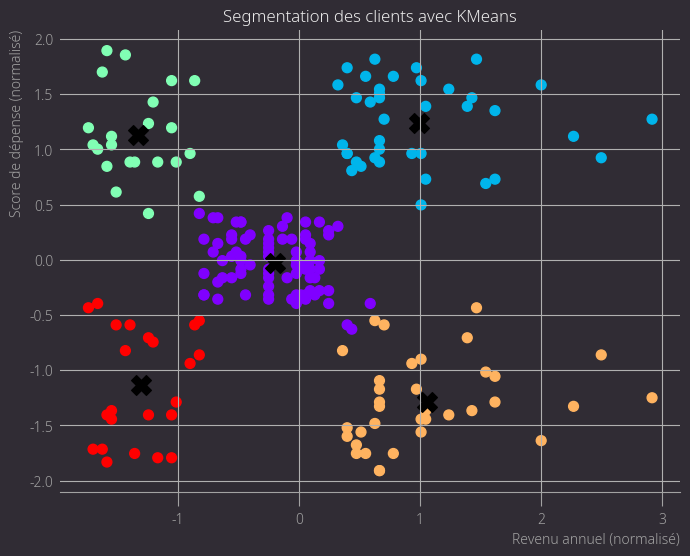

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='rainbow', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='X')
plt.xlabel("Revenu annuel (normalisé)")
plt.ylabel("Score de dépense (normalisé)")
plt.title("Segmentation des clients avec KMeans")
plt.grid(True)
plt.show()


In [ ]:
score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", round(score, 3))


Silhouette Score: 0.555


In [17]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Calculate Inertia (WCSS)
inertia = kmeans.inertia_
print(f"Inertia (WCSS): {inertia:.2f}")
# Interpretation: Lower values mean points are closer to their centroids.

# Calculate Silhouette Score
silhouette = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette:.3f}")
# Interpretation: Close to 1 = good clusters, close to 0 = ambiguous, negative = poor clustering.

# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(X_scaled, labels)
print(f"Davies-Bouldin Index: {db_score:.3f}")
# Interpretation: Lower values indicate more compact and better-separated clusters.

# Calculate Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X_scaled, labels)
print(f"Calinski-Harabasz Index: {ch_score:.2f}")
# Interpretation: Higher values indicate denser and well-separated clusters.



Inertia (WCSS): 65.57
Silhouette Score: 0.555
Davies-Bouldin Index: 0.572
Calinski-Harabasz Index: 248.65


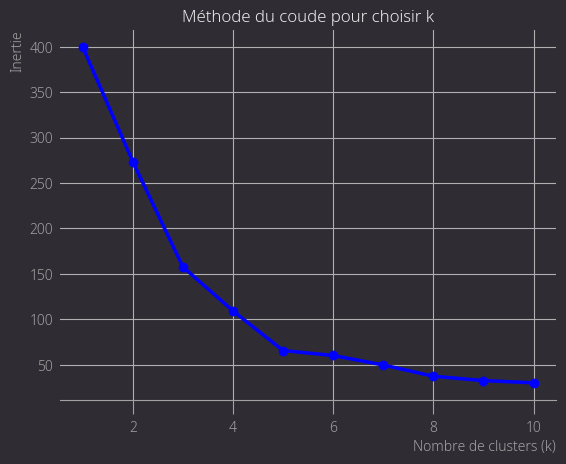

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd


inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Visualiser la méthode du coude
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title("Méthode du coude pour choisir k")
plt.grid(True)
plt.show()


In [ ]:
data["Cluster"].value_counts()

Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

In [ ]:
data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


In [ ]:
# Exemple : si cluster 1 = gros dépensiers
data['Segment'] = data['Cluster'].map({
    0: 'Prudents',
    1: 'Gros dépensiers',
    2: 'Clients moyens',
    3: 'Faible revenu',
    4: 'VIP'
})

data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Segment
0,1,Male,19,15,39,4,VIP
1,2,Male,21,15,81,2,Clients moyens
2,3,Female,20,16,6,4,VIP
3,4,Female,23,16,77,2,Clients moyens
4,5,Female,31,17,40,4,VIP
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,Gros dépensiers
196,197,Female,45,126,28,3,Faible revenu
197,198,Male,32,126,74,1,Gros dépensiers
198,199,Male,32,137,18,3,Faible revenu


In [ ]:
data.groupby('Cluster')["Annual Income (k$)"].mean()


Cluster
0    55.296296
1    86.538462
2    25.727273
3    88.200000
4    26.304348
Name: Annual Income (k$), dtype: float64

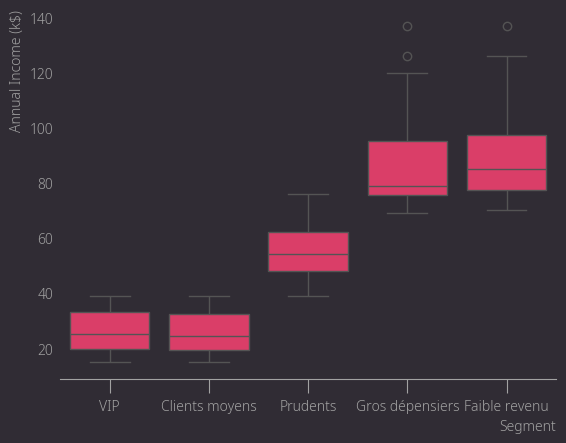

In [ ]:
import seaborn as sns

sns.boxplot(x='Segment', y='Annual Income (k$)', data=data)
plt.show()

In [ ]:
import plotly.express as px

# Create a 2D scatter plot
fig = px.scatter(
    data,
    x='Annual Income (k$)',           # X_scaled-axis variable
    y='Spending Score (1-100)',       # Y-axis variable
    color='Cluster',                  # Color by cluster
    title='Customer Segmentation by Income and Spending Score',
    labels={
        'Annual Income (k$)': 'Annual Income (k$)',
        'Spending Score (1-100)': 'Spending Score (1-100)'
    },
    hover_data=['Gender'],            # Show gender on hover
    size_max=25                       # Maximum point size
)

# Customize the layout
fig.update_layout(
    showlegend=True,
    legend_title_text='Cluster',
    xaxis_title='Annual Income (k$)',
    yaxis_title='Spending Score (1-100)',
    font=dict(size=12),
    width=800,
    height=600
)

# Display the plot
fig.show()